# RBC Model
 0.0.1 --> started 20 Jan 2023
 
0.0.2--> 2 feb (starting to do ICA, cleaning up simualtion logger notes, maybe NMF)

0.0.3 --> made violin plots, fixing percs df csv naming issues

In [1]:
import os
import re
import warnings
# from cobra.io import *
from cobra.io.json import load_json_model as load_json_cobra_model
import escher
import mass
import numpy as np
import pandas as pd
import equilibrator_api
from equilibrator_api import ComponentContribution, Q_
import sympy as sym
from cobra import Model, Reaction, Metabolite
import cobra.test
from os.path import join
from mass.util import qcqa
from mass.util import qcqa_model
from cobra import DictList
from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io.json import save_json_model as save_json_mass_model
from mass.visualization import plot_comparison, plot_time_profile
from mass.visualization import (
    plot_ensemble_phase_portrait, plot_ensemble_time_profile)
mass_config = MassConfiguration()
mass_config.irreversible_Keq = float("inf")
print("MASSpy version: {0}".format(mass.__version__))
from six import iteritems
import matplotlib.pyplot as plt
from mass.thermo import (
    ConcSolver, sample_concentrations,
    update_model_with_concentration_solution)
# from cobra.io.json import *
import cobra_dict as c_d
import csv
import altair as alt
from minspan.minspan import minspan,nnz
from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io import json, sbml
from mass.util import qcqa_model

mass_config = MassConfiguration()

mass_config.irreversible_Keq = float("inf")
# from minspan import minspan,nnz

MASSpy version: 0.1.6


In [2]:
maps_dir = os.path.abspath("maps")
data_dir = os.path.abspath("data")
dir = os.path.abspath("")
model_dir = os.path.abspath("models")
minspan_dir= os.path.abspath("minspans_csv")

### Getting reactions and metabolite data from RECON 3D

In [3]:
# making dataframe of metabolites

csv_met = os.path.join(data_dir,"rbc_met_gluco.csv")
met_csv_df = pd.read_csv(csv_met,index_col="id")
metabolite_info=met_csv_df.to_dict(orient='index')


### Loading MASS model

In [54]:
ppp = MassModel("PentosePhosphatePathway")


In [55]:
import json

In [56]:
g6p_c = MassMetabolite(
    "g6p_c",
    name="D-Glucose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

_6pgl_c = MassMetabolite(
    "_6pgl_c",
    name="6-Phospho-D-gluco-1,5-lactone",
    formula="C6H9O9P",
    charge=-2,
    compartment="c",
    fixed=False)

_6pgc_c = MassMetabolite(
    "_6pgc_c",
    name="6-Phospho-D-gluconate",
    formula="C6H10O10P",
    charge=-3,
    compartment="c",
    fixed=False)

ru5p__D_c = MassMetabolite(
    "ru5p__D_c",
    name="D-Ribulose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

r5p_c = MassMetabolite(
    "r5p_c",
    name="Alpha-D-Ribose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

xu5p__D_c = MassMetabolite(
    "xu5p__D_c",
    name="D-Xylulose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

g3p_c = MassMetabolite(
    "g3p_c",
    name="Glyceraldehyde 3-phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

s7p_c = MassMetabolite(
    "s7p_c",
    name="Sedoheptulose 7-phosphate",
    formula="C7H13O10P",
    charge=-2,
    compartment="c",
    fixed=False)

f6p_c = MassMetabolite(
    "f6p_c",
    name="D-Fructose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

e4p_c = MassMetabolite(
    "e4p_c",
    name="D-Erythrose 4-phosphate",
    formula="C4H7O7P",
    charge=-2,
    compartment="c",
    fixed=False)

h_c = MassMetabolite(
    "h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c",
    fixed=False)

nadp_c = MassMetabolite(
    "nadp_c",
    name="Nicotinamide adenine dinucleotide phosphate",
    formula="[NADP]-C21H25N7O17P3",
    charge=-3,
    compartment="c",
    fixed=False)

nadph_c = MassMetabolite(
    "nadph_c",
    name="Nicotinamide adenine dinucleotide phosphate - reduced",
    formula="[NADP]-C21H26N7O17P3",
    charge=-4,
    compartment="c",
    fixed=False)

h2o_c = MassMetabolite(
    "h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c",
    fixed=False)

gthox_c = MassMetabolite(
    "gthox_c",
    name="Oxidized glutathione",
    formula="C20H30N6O12S2",
    charge=-2,
    compartment="c",
    fixed=False)

gthrd_c = MassMetabolite(
    "gthrd_c",
    name="Reduced glutathione",
    formula="C10H16N3O6S",
    charge=-1,
    compartment="c",
    fixed=False)

co2_c = MassMetabolite(
    "co2_c",
    name="CO2",
    formula="CO2",
    charge=0,
    compartment="c",
    fixed=False)

In [57]:
G6PDH2r = MassReaction(
    "G6PDH2r",
    name="Glucose 6-phosphate dehydrogenase",
    subsystem=ppp.id,
    reversible=True)
G6PDH2r.add_metabolites({
    g6p_c: -1,
    nadp_c: -1,
    _6pgl_c: 1,
    nadph_c: 1,
    h_c: 1})

PGL = MassReaction(
    "PGL",
    name="6-phosphogluconolactonase",
    subsystem=ppp.id,
    reversible=True)
PGL.add_metabolites({
    _6pgl_c: -1,
    h2o_c: -1,
    _6pgc_c: 1,
    h_c: 1})

GND = MassReaction(
    "GND",
    name="Phosphogluconate dehydrogenase",
    subsystem=ppp.id,
    reversible=True)
GND.add_metabolites({
    _6pgc_c: -1,
    nadp_c: -1,
    nadph_c: 1,
    co2_c: 1,
    ru5p__D_c: 1})

RPI = MassReaction(
    "RPI",
    name="Ribulose 5-Phosphate Isomerase",
    subsystem=ppp.id,
    reversible=True)
RPI.add_metabolites({
    ru5p__D_c: -1,
    r5p_c: 1})

RPE = MassReaction(
    "RPE",
    name="Ribulose 5-phosphate 3-epimerase",
    subsystem=ppp.id,
    reversible=True)
RPE.add_metabolites({
    ru5p__D_c: -1,
    xu5p__D_c: 1})

TKT1 = MassReaction(
    "TKT1",
    name="Transketolase",
    subsystem=ppp.id,
    reversible=True)
TKT1.add_metabolites({
    r5p_c: -1,
    xu5p__D_c: -1,
    g3p_c: 1,
    s7p_c: 1})

TALA = MassReaction(
    "TALA",
    name="Transaldolase",
    subsystem=ppp.id,
    reversible=True)
TALA.add_metabolites({
    g3p_c: -1,
    s7p_c: -1,
    e4p_c: 1,
    f6p_c: 1})

TKT2 = MassReaction(
    "TKT2",
    name="Transketolase",
    subsystem=ppp.id,
    reversible=True)
TKT2.add_metabolites({
    e4p_c: -1,
    xu5p__D_c: -1,
    f6p_c: 1,
    g3p_c: 1})

GTHOr = MassReaction(
    "GTHOr",
    name="Glutathione oxidoreductase",
    subsystem="Misc.",
    reversible=True)
GTHOr.add_metabolites({
    gthox_c: -1,
    h_c: -1,
    nadph_c: -1,
    gthrd_c: 2,
    nadp_c: 1})

GSHR = MassReaction(
    "GSHR",
    name="Glutathione-disulfide reductase",
    subsystem="Misc.",
    reversible=True)
GSHR.add_metabolites({
    gthrd_c: -2,
    gthox_c: 1,
    h_c: 2})

In [58]:
ppp.add_reactions([
    G6PDH2r, PGL, GND, RPI, RPE, TKT1, TALA, TKT2, GTHOr, GSHR])

for reaction in ppp.reactions:
    print(reaction)

G6PDH2r: g6p_c + nadp_c <=> _6pgl_c + h_c + nadph_c
PGL: _6pgl_c + h2o_c <=> _6pgc_c + h_c
GND: _6pgc_c + nadp_c <=> co2_c + nadph_c + ru5p__D_c
RPI: ru5p__D_c <=> r5p_c
RPE: ru5p__D_c <=> xu5p__D_c
TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c
TALA: g3p_c + s7p_c <=> e4p_c + f6p_c
TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c
GTHOr: gthox_c + h_c + nadph_c <=> 2 gthrd_c + nadp_c
GSHR: 2 gthrd_c <=> gthox_c + 2 h_c


In [59]:
# trial.add_boundary(trial.metabolites.get_by_id("nadh_c"), type="sink")
# trial.add_boundary(trial.metabolites.get_by_id("nad_c"), type="sink")


In [60]:
for r in ppp.reactions:
    print(r.id,  r.check_mass_balance())

G6PDH2r {}
PGL {}
GND {}
RPI {}
RPE {}
TKT1 {}
TALA {}
TKT2 {}
GTHOr {}
GSHR {'charge': 2}


In [61]:
# sink_dict = {"SK_glc__D_c":1,
# "SK_lac__L_c": 1,
# "SK_pyr_c": 0.06,
# "SK_h_c":6.30957e-05,
#  "SK_h2o_c": 1,
#  "SK_amp_c": 1,
#  "DM_amp_c": 1}

# for i in sink_dict:
#     # print(sink_dict[i])
#     sink_rxn = glycolysis.boundary
#     sink_rxn.boundary_condition = sink_dict[i]



# glycolysis.reactions.get_by_id("SK_glc__D_c").reverse_stoichiometry(inplace=True)


In [62]:
DM_f6p_c = ppp.add_boundary(
    metabolite=f6p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

DM_r5p_c = ppp.add_boundary(
    metabolite=r5p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

DM_g3p_c = ppp.add_boundary(
    metabolite=g3p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_g6p_c = ppp.add_boundary(
    metabolite=g6p_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_g6p_c.reverse_stoichiometry(inplace=True)

SK_h_c = ppp.add_boundary(
    metabolite=h_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=6.30957e-05)

SK_h2o_c = ppp.add_boundary(
    metabolite=h2o_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_co2_c = ppp.add_boundary(
    metabolite=co2_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

print("Boundary Reactions and Values\n-----------------------------")
for reaction in ppp.boundary:
    boundary_met = reaction.boundary_metabolite
    bc_value = ppp.boundary_conditions.get(boundary_met)
    print("{0}\n{1}: {2}\n".format(
        reaction, boundary_met, bc_value))

Boundary Reactions and Values
-----------------------------
DM_f6p_c: f6p_c --> 
f6p_b: 1.0

DM_r5p_c: r5p_c --> 
r5p_b: 1.0

DM_g3p_c: g3p_c --> 
g3p_b: 1.0

SK_g6p_c:  <=> g6p_c
g6p_b: 1.0

SK_h_c: h_c <=> 
h_b: 6.30957e-05

SK_h2o_c: h2o_c <=> 
h2o_b: 1.0

SK_co2_c: co2_c <=> 
co2_b: 1.0



In [63]:
new_metabolite_order = [
    "f6p_c", "g6p_c", "g3p_c", "_6pgl_c", "_6pgc_c",
    "ru5p__D_c", "xu5p__D_c", "r5p_c", "s7p_c", "e4p_c",
    "nadp_c", "nadph_c", "gthrd_c", "gthox_c", "co2_c",
    "h_c", "h2o_c"]

if len(ppp.metabolites) == len(new_metabolite_order):
    ppp.metabolites = DictList(
        ppp.metabolites.get_by_any(new_metabolite_order))

new_reaction_order = [
    "G6PDH2r", "PGL", "GND", "RPE", "RPI",
    "TKT1", "TKT2", "TALA", "GTHOr", "GSHR",
    "SK_g6p_c", "DM_f6p_c", "DM_g3p_c","DM_r5p_c",
    "SK_co2_c", "SK_h_c", "SK_h2o_c"]

if len(ppp.reactions) == len(new_reaction_order):
    ppp.reactions = DictList(
        ppp.reactions.get_by_any(new_reaction_order))

ppp.update_S(array_type="DataFrame", dtype=int)

,G6PDH2r,PGL,GND,RPE,RPI,TKT1,TKT2,TALA,GTHOr,GSHR,SK_g6p_c,DM_f6p_c,DM_g3p_c,DM_r5p_c,SK_co2_c,SK_h_c,SK_h2o_c
f6p_c,0,0,0,0,0,0,1,1,0,0,0,-1,0,0,0,0,0
g6p_c,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
g3p_c,0,0,0,0,0,1,1,-1,0,0,0,0,-1,0,0,0,0
_6pgl_c,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
_6pgc_c,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ru5p__D_c,0,0,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0
xu5p__D_c,0,0,0,1,0,-1,-1,0,0,0,0,0,0,0,0,0,0
r5p_c,0,0,0,0,1,-1,0,0,0,0,0,0,0,-1,0,0,0
s7p_c,0,0,0,0,0,1,0,-1,0,0,0,0,0,0,0,0,0
e4p_c,0,0,0,0,0,0,-1,1,0,0,0,0,0,0,0,0,0


In [64]:
minspan_paths = [
    [1, 1, 1, 2/3, 1/3, 1/3, 1/3, 1/3, 2, 2, 1, 2/3, 1/3, 0, 1, 4, -1],
    [1, 1, 1,  0,   1,   0,   0,   0,  2, 2, 1,  0,   0,  1, 1, 4, -1]]
ppp.compute_steady_state_fluxes(
    pathways=minspan_paths,
    independent_fluxes={
        SK_g6p_c: 0.21,
        DM_r5p_c: 0.01},
    update_reactions=True)

print("Steady State Fluxes\n-------------------")
for reaction, steady_state_flux in ppp.steady_state_fluxes.items():
    print("{0}: {1:.6f}".format(reaction.flux_symbol_str, steady_state_flux))

Steady State Fluxes
-------------------
v_G6PDH2r: 0.210000
v_PGL: 0.210000
v_GND: 0.210000
v_RPE: 0.133333
v_RPI: 0.076667
v_TKT1: 0.066667
v_TKT2: 0.066667
v_TALA: 0.066667
v_GTHOr: 0.420000
v_GSHR: 0.420000
v_SK_g6p_c: 0.210000
v_DM_f6p_c: 0.133333
v_DM_g3p_c: 0.066667
v_DM_r5p_c: 0.010000
v_SK_co2_c: 0.210000
v_SK_h_c: 0.840000
v_SK_h2o_c: -0.210000


In [65]:
g6p_c.ic = 0.0486
f6p_c.ic = 0.0198
g3p_c.ic = 0.00728
_6pgl_c.ic = 0.00175424
_6pgc_c.ic = 0.0374753
ru5p__D_c.ic = 0.00493679
xu5p__D_c.ic = 0.0147842
r5p_c.ic = 0.0126689
s7p_c.ic = 0.023988
e4p_c.ic = 0.00507507
nadp_c.ic = 0.0002
nadph_c.ic = 0.0658
gthrd_c.ic = 3.2
gthox_c.ic = 0.12
co2_c.ic = 1
h_c.ic = 0.0000714957
h2o_c.ic = 1

print("Initial Conditions\n------------------")
for metabolite, ic_value in ppp.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

ic_info = pd.DataFrame()
met_list =[]
met_conc = []
print("Initial Conditions\n------------------")
for metabolite, ic_value in ppp.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))
    met_list.append(str(metabolite))
    met_conc.append(ic_value)

ic_info["metabolite"] = met_list
ic_info["concentrations"] = met_conc

Initial Conditions
------------------
f6p_c: 0.0198
g6p_c: 0.0486
g3p_c: 0.00728
_6pgl_c: 0.00175424
_6pgc_c: 0.0374753
ru5p__D_c: 0.00493679
xu5p__D_c: 0.0147842
r5p_c: 0.0126689
s7p_c: 0.023988
e4p_c: 0.00507507
nadp_c: 0.0002
nadph_c: 0.0658
gthrd_c: 3.2
gthox_c: 0.12
co2_c: 1
h_c: 7.14957e-05
h2o_c: 1
Initial Conditions
------------------
f6p_c: 0.0198
g6p_c: 0.0486
g3p_c: 0.00728
_6pgl_c: 0.00175424
_6pgc_c: 0.0374753
ru5p__D_c: 0.00493679
xu5p__D_c: 0.0147842
r5p_c: 0.0126689
s7p_c: 0.023988
e4p_c: 0.00507507
nadp_c: 0.0002
nadph_c: 0.0658
gthrd_c: 3.2
gthox_c: 0.12
co2_c: 1
h_c: 7.14957e-05
h2o_c: 1


In [66]:
ic_info=ic_info.set_index('metabolite')
ic_info

,concentrations
metabolite,
f6p_c,0.019800
g6p_c,0.048600
g3p_c,0.007280
_6pgl_c,0.001754
_6pgc_c,0.037475
ru5p__D_c,0.004937
xu5p__D_c,0.014784
r5p_c,0.012669
s7p_c,0.023988


In [67]:
G6PDH2r.Keq = 1000
PGL.Keq = 1000
GND.Keq = 1000
RPE.Keq = 3
RPI.Keq = 2.57
TKT1.Keq = 1.2
TKT2.Keq = 10.3
TALA.Keq = 1.05
GTHOr.Keq = 100
GSHR.Keq = 2

SK_g6p_c.Keq = 1
SK_h_c.Keq = 1
SK_h2o_c.Keq = 1
SK_co2_c.Keq = 1

print("Equilibrium Constants\n---------------------")
for reaction in ppp.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

Equilibrium Constants
---------------------
Keq_G6PDH2r: 1000
Keq_PGL: 1000
Keq_GND: 1000
Keq_RPE: 3
Keq_RPI: 2.57
Keq_TKT1: 1.2
Keq_TKT2: 10.3
Keq_TALA: 1.05
Keq_GTHOr: 100
Keq_GSHR: 2
Keq_SK_g6p_c: 1
Keq_DM_f6p_c: inf
Keq_DM_g3p_c: inf
Keq_DM_r5p_c: inf
Keq_SK_co2_c: 1
Keq_SK_h_c: 1
Keq_SK_h2o_c: 1


### Running Concentration QP

In [68]:
for metabolite in ["h_c", 
"h2o_c"]:
    metabolite = ppp.metabolites.get_by_id(metabolite)
    metabolite.ic = 1 #M

In [69]:
#Formulate QP minimization list for concentrations
conc_solver = ConcSolver(
    ppp,
    constraint_buffer=1)

conc_solver.setup_feasible_qp_problem(
fixed_conc_bounds=list(ppp.fixed))
# fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    
#assumption: provide uncertainity to allow for a variance for the Keqs rather than staying fixed
conc_solver.setup_feasible_qp_problem(Keq_percent_deviation=0.1)

conc_solution = conc_solver.optimize()
conc_solution

mass\util\util.py:159 UserWarning: Unrecognized kwargs: ['Keq_percent_deviation']
mass\thermo\conc_solution.py:98 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
mass\thermo\conc_solution.py:99 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,variables,reduced_costs
f6p_c,0.015704,0.0
g6p_c,0.048600,0.0
g3p_c,0.006276,0.0
_6pgl_c,0.001754,0.0
_6pgc_c,0.037475,0.0
...,...,...
Keq_TKT1,1.754866,0.0
Keq_TKT2,10.300000,0.0
Keq_TALA,1.323829,0.0
Keq_GTHOr,100.000000,0.0


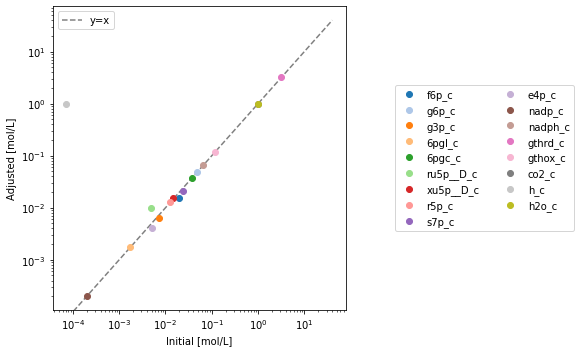

In [70]:
conc_comparison_fig, ax = plt.subplots(nrows=1, ncols=1,
                                       figsize=(5, 5))

plot_comparison(
    x=ic_info["concentrations"], y=conc_solution,
    compare="concentrations",
    observable=[mid for mid in ic_info.index], ax=ax,
    legend="right outside", plot_function="loglog",
    # xlim=(1e-6,0.02), ylim=(1e-6,1e-1),
    xy_line=True,
    xy_legend="best", xlabel="Initial [mol/L]", ylabel="Adjusted [mol/L]")

conc_comparison_fig.tight_layout()


In [21]:
# update_model_with_concentration_solution(
#     ppp, conc_solution, concentrations=True, inplace=True);

In [71]:
conc_solution_adjusted = conc_solution.to_frame()
conc_fig_df = pd.DataFrame()
conc_fig_df["Initial"] = ic_info["concentrations"]
conc_fig_df["Adjusted"] = conc_solution_adjusted["variables"]
conc_fig_df["Metabolite"] = ic_info.index
# conc_fig_df

mass\thermo\conc_solution.py:98 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
mass\thermo\conc_solution.py:99 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [72]:
line_min = conc_fig_df.min()
line_min

Initial       0.000071
Adjusted        0.0002
Metabolite     _6pgc_c
dtype: object

In [73]:
conc_fig_comp = alt.Chart(conc_fig_df).mark_circle(size= 100).encode(
    alt.X("Initial", axis=alt.Axis( tickCount=0), scale=alt.Scale(type='log')),
    alt.Y('Adjusted',axis=alt.Axis( tickCount=5), 
    scale=alt.Scale(type='log')), 

    alt.Color('Metabolite', scale=alt.Scale(scheme='turbo')), 
    tooltip=['Metabolite', "Initial", "Adjusted"]
).properties(
    width=400,
    height=400).interactive()
conc_fig_comp

alt.Chart(...)

 Getting Standard and Physiological Gibbs energies of reactions

In [25]:
#  possibly running comparison tests b/w equilibrator and published values?


Caluclation of percs

In [74]:
percs = ppp.calculate_PERCs(update_reactions=True)

print("Forward Rate Constants\n----------------------")
for reaction in ppp.reactions:
    print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

percs_df = pd.DataFrame.from_dict(percs, orient='index', columns = ["OG"])


Forward Rate Constants
----------------------
kf_G6PDH2r: 21864.589249
kf_PGL: 122.323112
kf_GND: 29287.807474
kf_RPE: 15284.677111
kf_RPI: 10564.620051
kf_TKT1: 1595.951975
kf_TKT2: 1092.246435
kf_TALA: 844.616138
kf_GTHOr: 53.329812
kf_GSHR: 0.041257
kf_SK_g6p_c: 0.220727
kf_DM_f6p_c: 6.734007
kf_DM_g3p_c: 9.157509
kf_DM_r5p_c: 0.789335
kf_SK_co2_c: 100000.000000
kf_SK_h_c: 0.840053
kf_SK_h2o_c: 100000.000000


### Perc sampling

In [75]:
seed = int(1)
n_models = 1500

first trying with 1 order of magnitude

In [76]:
conc_solver.setup_sampling_problem(
    fixed_conc_bounds=list(ppp.fixed),
    # fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    )
for variable in conc_solver.variables:
    try:
        met = ppp.metabolites.get_by_id(variable.name)
        variable.lb, variable.ub = np.log([met.ic / 5, met.ic * 5])
    except:
        pass
conc_samples = sample_concentrations(conc_solver, n=n_models,  processes=4, seed=seed)
conc_samples.head()


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpthow6cyz.lp
Reading time = 0.01 seconds
: 17 rows, 34 columns, 90 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp57f7wt7e.lp
Reading time = 0.01 seconds
: 10 rows, 27 columns, 48 nonzeros


,f6p_c,g6p_c,g3p_c,_6pgl_c,_6pgc_c,ru5p__D_c,xu5p__D_c,r5p_c,s7p_c,e4p_c,nadp_c,nadph_c,gthrd_c,gthox_c,co2_c,h_c,h2o_c
0,0.006958,0.061252,0.002086,0.005518,0.106860,0.021569,0.004325,0.014313,0.015717,0.002185,0.000185,0.173609,13.613020,0.587915,0.982094,1.088028,0.228709
1,0.009137,0.035070,0.026962,0.008147,0.072626,0.018317,0.020000,0.020315,0.007983,0.010919,0.000076,0.024430,1.719364,0.157684,1.081892,2.262753,0.321652
2,0.005578,0.019926,0.009520,0.003421,0.027768,0.014160,0.010029,0.013906,0.007761,0.006139,0.000118,0.020521,1.460309,0.180794,1.184717,2.322143,0.506284
3,0.004027,0.099092,0.004029,0.000560,0.021397,0.014236,0.007917,0.014074,0.014651,0.006794,0.000275,0.035587,5.759391,0.579425,1.819065,0.828249,2.418866
4,0.006979,0.061051,0.001495,0.001049,0.052546,0.022425,0.004162,0.015123,0.022308,0.002215,0.000321,0.022551,3.717726,0.185859,0.438270,0.770321,1.693757


In [77]:
boundary_metabolites = []
for m in ppp.boundary:
    for i in (m.metabolites.keys()):
        if str(i) not in boundary_metabolites:
            boundary_metabolites.append(str(i))
            print(i)

g6p_c
f6p_c
g3p_c
r5p_c
co2_c
h_c
h2o_c


In [78]:
metabolite_ids = [m.id for m in ppp.metabolites]
misbalance= pd.DataFrame(
    ppp.S.dot(np.array(list(ppp.steady_state_fluxes.values()))),
    index=metabolite_ids,
    columns=[r"$\textbf{Sv}_{\mathrm{stst}}$"])
misbalance.T

,f6p_c,g6p_c,g3p_c,_6pgl_c,_6pgc_c,ru5p__D_c,xu5p__D_c,r5p_c,s7p_c,e4p_c,nadp_c,nadph_c,gthrd_c,gthox_c,co2_c,h_c,h2o_c
$\textbf{Sv}_{\mathrm{stst}}$,0.0,0.0,0.0,0.0,0.0,4.163336e-17,0.0,-5.204170e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# Determine imbalances in the reduced network
fluxes = np.array(list(ppp.steady_state_fluxes.values()))
imbalanced_metabolites = ppp.S.dot(fluxes)
imbalanced_metabolites
# potentially just round this all to 0


f6p_c        0.000000e+00
g6p_c        0.000000e+00
g3p_c        0.000000e+00
_6pgl_c      0.000000e+00
_6pgc_c      0.000000e+00
ru5p__D_c    4.163336e-17
xu5p__D_c    0.000000e+00
r5p_c       -5.204170e-18
s7p_c        0.000000e+00
e4p_c        0.000000e+00
nadp_c       0.000000e+00
nadph_c      0.000000e+00
gthrd_c      0.000000e+00
gthox_c      0.000000e+00
co2_c        0.000000e+00
h_c          0.000000e+00
h2o_c        0.000000e+00
dtype: float64

In [32]:
# Iterate through metabolites
for mid, imbalance in imbalanced_metabolites.iteritems():
    met = ppp.metabolites.get_by_id(mid)
    if imbalance != 0:
        if str(mid) not in boundary_metabolites:
            print(mid)

ru5p__D_c


In [87]:
models_for_ensemble = []
for idx, conc_sample in conc_samples.iterrows():
    # Make copy of new model
    new_model = ppp.copy()
    new_model.id += "_C{0:d}".format(idx)
    # Get concentration sample and update model with sample
    new_model.update_initial_conditions(conc_sample.to_dict())

    # Determine imbalances in the reduced network
    fluxes = np.array(list(new_model.steady_state_fluxes.values()))
    imbalanced_metabolites = new_model.S.dot(fluxes)

    # Iterate through metabolites
    for mid, imbalance in imbalanced_metabolites.iteritems():
        # Ignore balanced metabolites
        if imbalance == 0:
            continue
        # Get metabolite object
        met = new_model.metabolites.get_by_id(mid)
        if str(mid) not in boundary_metabolites:
            # print(mid)
            # Add boundary reactions for imbalanced metabolites
            boundary_type = "sink"    
            # Add boundary reaction with imbalance as flux value
            boundary_reaction = new_model.add_boundary(
                mid, boundary_type, boundary_condition=met.ic)

            boundary_reaction.Keq = 1
            if imbalance < 0:
                boundary_reaction.reverse_stoichiometry(inplace=True)
                imbalance = -imbalance

            boundary_reaction.kf = imbalance / met.ic
            boundary_reaction.steady_state_flux = imbalance
            try:
                # Update PERCs
                percs = new_model.calculate_PERCs(
                    fluxes={
                        r: v for r, v in new_model.steady_state_fluxes.items()
                        if not r.boundary},
                    update_reactions=True)
            except:
                print("Negative PERCs for {0}".format(new_model.id))
                continue




    df_p = pd.DataFrame.from_dict(percs, orient='index')
    df_p.columns = [("No."+ str(idx))]
    percs_df = pd.merge(percs_df, df_p, how='inner', left_index=True, right_index=True)
        # except:
        #     print("Negative PERCs for {0}".format(new_model.id))

        #     df_p = pd.DataFrame.from_dict(percs, orient='index')
        #     df_p.columns = [("No."+ str(idx))]
        #     percs_df = pd.merge(percs_df, df_p, how='inner', left_index=True, right_index=True)
        #     percs_df = pd.join([percs_df, df_p])
            
        #     continue



        
    models_for_ensemble.append(new_model)
print("Number of models in ensemble: {0:d}".format(
    len(models_for_ensemble)))

Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpkpk907ai.lp
Reading time = 0.00 seconds
: 17 rows, 34 columns, 90 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpcclio8_8.lp
Reading time = 0.00 seconds
: 17 rows, 34 columns, 90 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpjpe47yfq.lp
Reading time = 0.00 seconds
: 10 rows, 27 columns, 48 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpnghti7k2.lp
Reading time = 0.00 seconds
: 17 rows, 34 columns, 90 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpuiq14qgc.lp
Reading time = 0.00 seconds
: 17 rows, 34 columns, 90 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp3buho5ih.lp
Reading time = 0.00 seconds
: 10 rows, 27 columns, 48 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpllqxrigz.lp
Reading time = 0.00 seconds
: 17 rows, 34 columns, 90 nonzeros

#### Trying to simulate

In [36]:
# percs = ppp.calculate_PERCs(update_reactions=True)
# percs_df_sim = pd.DataFrame.from_dict(percs, orient='index', columns = ["OG"])

In [37]:
# # Ensure all models are simulated to a long time and that
# # there are enough time points to determine if model reached steady state.
# tfinal = 1e4
# verbose = False
# sim = Simulation(reference_model=models_for_ensemble[0], verbose=verbose)
# sim.add_models(models_for_ensemble[1:], verbose=verbose, disable_safe_load=True)
# sim.integrator.absolute_tolerance = 1e-15
# sim.integrator.relative_tolerance = 1e-9

# models_to_export = []
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     for model in models_for_ensemble:
#         # Attempt to determine steady state
#         conc_sol, flux_sol = sim.find_steady_state(
#             models=model, strategy="simulate", update_values=True,
#             tfinal=tfinal, 
#             verbose=verbose)
#         if conc_sol and flux_sol:
#             continue
#         print(str(model) + " first attempt failed.")
#         # First attempt was not successful, lengthen time for second attempt
#         # Attempt to determine steady state
#         conc_sol, flux_sol = sim.find_steady_state(
#             models=model, strategy="simulate", update_values=True,
#             tfinal=tfinal * 10, 
#             verbose=verbose)
#         if conc_sol and flux_sol:
#             continue
#         print(str(model) + " second attempt failed.")
#         # Second attempt was not successful, lengthen time for second attempt
#         # Attempt to determine steady state
#         conc_sol, flux_sol = sim.find_steady_state(
#             models=model, strategy="simulate", update_values=True,
#             tfinal=tfinal * 100, 
#             verbose=verbose)
        
#         if conc_sol and flux_sol:
#             sim_percs = pd.DataFrame()
#             for r in model.reactions:
#                 sim_percs.loc[len(sim_percs.index)] = [r.id, r.kf]
#                 sim_percs.columns = [("No."+ str(model))]
#             percs_df_sim = pd.merge(percs_df, df_p, how='inner', left_index=True, right_index=True)
#             continue
#         print(str(model) + " third attempt failed. Eliminating model.")
#         # Third attempt was not successful, eliminate the model
#         sim.remove_models(models=model, verbose=verbose)

In [38]:
# percs_df_sim

,OG
kf_G6PDH2r,21864.589249
kf_PGL,122.323112
kf_GND,30666.240679
kf_RPE,21.447036
kf_RPI,12.332046
kf_TKT1,524.533765
kf_TKT2,1279.739043
kf_TALA,812.501037
kf_GTHOr,53.329812
kf_GSHR,0.041257


In [39]:
# from mass.io.sbml import write_sbml_model
# from table_export import export_csv_files_for_models

In [40]:
# models_to_export = sim.get_model_objects(models=sim.models)
# for model in models_to_export:
#     # Save as JSON
#     save_json_mass_model(
#         mass_model=model,
#         filename=os.path.abspath(
#             os.path.join(
#                 model_dir, "JSON", model.id + ".json")))
#     # Save as SBML
#     write_sbml_model(
#         mass_model=model,
#         filename=os.path.abspath(
#             os.path.join(
#                 model_dir, "SBML", model.id + ".xml.zip")))
# Export tables
# export_csv_files_for_models(
    # models_to_export)
# print("Number of models exported: {0:d}".format(len(sim.models)))

NameError: name 'sim' is not defined

### Forming Percs Dataframe

In [88]:
percs_df.index.names = ['RXN']
percs_df

,OG,No.0,No.1,No.2,No.3,No.4,No.5,No.6,No.7,No.8,...,No.1490,No.1491,No.1492,No.1493,No.1494,No.1495,No.1496,No.1497,No.1498,No.1499
RXN,,,,,,,,,,,,,,,,,,,,,
kf_G6PDH2r,21864.589249,20231.252167,85113.857056,92409.082985,7708.996671,10722.517371,1763.486343,11075.734875,7607.119051,3724.015045,...,117014.513516,8211.301013,7950.003576,10200.901052,14051.486795,4889.108800,14504.975788,5038.175966,7521.842356,1616.393665
kf_PGL,122.323112,38.808603,26.008436,61.895596,389.836914,210.701362,300.166846,576.550341,462.599798,84.004825,...,48.194230,53.000698,77.806234,35.900684,173.841557,39.386991,44.507308,39.925841,36.152440,47.859042
kf_GND,29287.807474,13041.216620,41687.018007,71907.511611,42295.957236,12608.793392,8483.780018,39815.658491,73757.067232,7610.689708,...,330606.858169,19313.090543,13590.816398,8136.416183,47455.891057,4357.929540,16154.069951,4100.904024,10372.194579,5828.835983
kf_RPE,15284.677111,6.624571,11.444397,12.325875,11.497294,6.337830,8.651412,13.724658,9.671625,12.381428,...,24.331310,9.160132,7.383351,12.713866,9.729822,8.064834,13.830627,10.169947,10.849383,6.620318
kf_RPI,10564.620051,4.791875,7.363000,8.762721,8.752312,4.635012,5.494272,7.815140,5.213657,5.776698,...,10.836545,4.810555,3.565132,5.762829,4.635920,4.458478,6.720098,6.023952,6.944538,4.102206
kf_TKT1,1595.951975,1928.162996,293.761441,855.843719,1071.286064,1896.238983,329.704760,1070.532069,773.526068,611.987071,...,1856.768826,1056.953607,1677.471158,3133.967844,983.290968,647.499695,630.268110,1604.777871,3775.157263,2984.362126
kf_TKT2,1092.246435,8293.155490,342.825661,1181.742607,1276.970290,8124.332284,345.176459,872.702855,707.350952,335.488584,...,7722.178852,2679.432890,2653.854470,3084.552064,3835.204688,814.052623,2543.831467,3782.337946,11200.622822,7005.490639
kf_TALA,844.616138,3639.785024,554.532213,1615.572520,2022.262112,3579.522201,622.382263,2020.838799,1460.181843,1155.245371,...,3505.014556,1995.206793,3166.555115,5915.977668,1856.154146,1222.282400,1189.754411,3029.332310,7126.348187,5633.567595
kf_GTHOr,53.329812,4.128814,109.094070,113.281216,20.459136,101.282136,94.286454,77.143351,100.652421,242.968990,...,74.367092,9.738062,7.424617,4.134861,13.492938,53.277994,53.028965,14.324317,82.165209,9.740032


In [4]:
csv_percs = os.path.join(data_dir,"rbc_percs_ppp.csv")

In [4]:
percs_df.to_csv(csv_percs)

NameError: name 'percs_df' is not defined

### Percs Workflow

Log transforming it

In [5]:

og_percs_df = pd.read_csv(csv_percs,index_col="RXN")
percs_df = og_percs_df.copy()
# csv_percs

In [6]:
data_log = np.log(percs_df)
data_log

,OG,No.0,No.1,No.2,No.3,No.4,No.5,No.6,No.7,No.8,...,No.1490,No.1491,No.1492,No.1493,No.1494,No.1495,No.1496,No.1497,No.1498,No.1499
RXN,,,,,,,,,,,,,,,,,,,,,
kf_G6PDH2r,9.992624,9.914984,11.351745,11.433981,8.950143,9.280101,7.475048,9.312512,8.936840,8.222558,...,11.670053,9.013267,8.980928,9.230231,9.550483,8.494765,9.582247,8.524799,8.925566,7.387953
kf_PGL,4.806666,3.658642,3.258421,4.125449,5.965728,5.350442,5.704338,6.357063,6.136862,4.430874,...,3.875239,3.970305,4.354222,3.580756,5.158144,3.673436,3.795653,3.687024,3.587744,3.868260
kf_GND,10.284927,9.475870,10.637945,11.183136,10.652447,9.442150,9.045911,10.592016,11.208532,8.937309,...,12.708685,9.868538,9.517150,9.004105,10.767556,8.379752,9.689927,8.318963,9.246884,8.670573
kf_RPE,9.634606,1.890786,2.437500,2.511701,2.442112,1.846536,2.157723,2.619194,2.269196,2.516198,...,3.191764,2.214861,1.999228,2.542693,2.275196,2.087513,2.626885,2.319437,2.384108,1.890143
kf_RPI,9.265266,1.566922,1.996467,2.170507,2.169318,1.533639,1.703706,2.056063,1.651282,1.753832,...,2.382924,1.570812,1.271201,1.751428,1.533835,1.494808,1.905103,1.795744,1.937955,1.411525
kf_TKT1,7.375226,7.564323,5.682768,6.752088,6.976615,7.547628,5.798198,6.975911,6.650959,6.416711,...,7.526593,6.963146,7.425043,8.050055,6.890905,6.473118,6.446145,7.380741,8.236197,8.001141
kf_TKT2,6.995992,9.023186,5.837222,7.074745,7.152246,9.002619,5.844056,6.771595,6.561527,5.815588,...,8.951852,7.893360,7.883768,8.034162,8.251978,6.702025,7.841427,8.238098,9.323725,8.854449
kf_TALA,6.738882,8.199680,6.318125,7.387445,7.611972,8.182985,6.433554,7.611268,7.286316,7.052068,...,8.161950,7.598503,8.060400,8.685412,7.526262,7.108475,7.081502,8.016098,8.871554,8.636498
kf_GTHOr,3.976495,1.417990,4.692211,4.729873,3.018430,4.617910,4.546338,4.345665,4.611673,5.492934,...,4.309014,2.276042,2.004801,1.419454,2.602166,3.975523,3.970838,2.661959,4.408732,2.276244


In [7]:
from scipy import stats
from sklearn import cluster, metrics, decomposition # these will be useful
import seaborn as sns
import sklearn

In [8]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

def PCA_cluster_plot(data, cluster_labels, ax = None):
    """
    Parameters:
        data: the pd.DataFrame of gene expression data
        cluster_labels: a pd.Series with a cluster label
            for each column of data
        ax: if None, draw a new figure. else, populate these axes.
    Returns:
        ax: the plt.axes object of a PCA plot labeled by cluster
    """
    
    # check for bad input
    if isinstance(cluster_labels, pd.Series):
        if not(cluster_labels.index.equals(data.columns)):
            raise ValueError('cluster_labels.index doesn\'t match data.columns')
    else:
        raise TypeError('cluster_labels isn\'t a pd.Series')
    
    # compute PCA, save as dataframe with condition labels
    # data_norm = stats.zscore(data, axis=1)
    data_norm = sklearn.preprocessing.normalize(data,norm='l2')
    data_pc = PCA().fit_transform(data_norm.T)
    data_pc = pd.DataFrame(data_pc, index = data.columns)
    
    # get the unique clusters (supports naming if desired)
    unique_clusters = np.sort(cluster_labels.unique())
    
    # prepare a long list of colors
    colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
              'tab:brown','tab:pink','tab:gray','tab:olive', 'tab:cyan',
              'black', 'salmon', 'chocolate', 'orange', 'gold', 'lawngreen',
              'turquoise', 'steelblue', 'navy', 'violet', 'deeppink',
              'firebrick', 'sandybrown','olivedrab','darkgreen', 'aqua',
              'slategray', 'blue', 'fuschia', 'pink']
    
    # this code only runs if you have a ton of labels
    while len(colors) < len(cluster_labels.unique()):
        colors = colors + colors
    
    # make the plot
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_xlabel('PC1', fontsize = 16)
    ax.set_ylabel('PC2', fontsize = 16)
    
    # iterate through each cluster label
    for clust, color in zip(unique_clusters, colors):
        
        # get the samples of this cluster
        samples = cluster_labels.index[cluster_labels == clust]
        
        # add to plot
        ax.scatter(data_pc.loc[samples, 0],
                   data_pc.loc[samples, 1],
                   label = clust, color = color)
    
    # add legend
    ax.legend(bbox_to_anchor = (1,0))
    for i in range(data_pc.shape[0]):
        plt.text(x=data_pc.iloc[i,0]+0.1,y=data_pc.iloc[i,1]+0.05,s=data_pc.index[i])
    return ax

In [9]:
# create a DataFrame to store all the clusters
k_range = range(2, 10)
elbow_df = pd.DataFrame(index = data_log.index, 
                        columns = k_range)

# compute the clusters at each k
for k in k_range:
    
    # repeat code from problem 1.2.1
    k_clusters = cluster.KMeans(n_clusters = k, random_state = 1)
    k_clusters = k_clusters.fit(data_log)
    
    # store in DataFrame
    elbow_df[k] = k_clusters.labels_

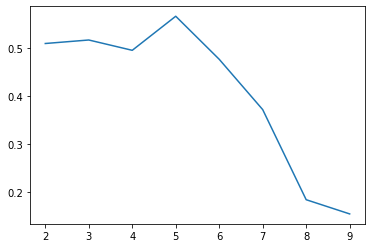

In [10]:
# compute the silhouette scores
k_silhouette = pd.Series(index = k_range, dtype=float)

for k in k_range:
    k_silhouette[k] = metrics.silhouette_score(data_log, elbow_df[k])
    
# plot
fig, ax = plt.subplots()
ax.plot(k_range, k_silhouette)

In [11]:
# output, look at plot, and pick the best k
# I think it is k = 4
# so I'll draw it on now
# best_k = 4
# ax.scatter(best_k, k_silhouette[best_k], color = 'r', s = 50)
# ax.set_xlabel('K')
# ax.set_ylabel('Silhouette Score')

# print('Optimal K =', best_k)

In [12]:
# mean_silhouette = pd.Series(index = k_range, dtype=float)

# # increase this number to make the curve smoother
# # requires a lot of time to run
# num_repeats = 10

# for k in k_range:
#     k_scs = []
#     for i in range(num_repeats):
#         # DO NOT specify a random state so we intentionally 
#         # get different results
#         k_clusters = cluster.KMeans(n_clusters = k)
#         k_clusters = k_clusters.fit(percs_df.T)
        
#         # add this silhouette score
#         k_scs += [metrics.silhouette_score(percs_df.T, k_clusters.labels_)]
    
#     # take the mean silhouette score
#     mean_silhouette[k] = np.mean(k_scs)

In [13]:
# X = percs_df
# distorsions = []
# for k in range(2, 10):
#     kmeans = cluster.KMeans(n_clusters=k)
#     kmeans.fit(X)
#     distorsions.append(kmeans.inertia_)

In [14]:
# fig, ax = plt.subplots()
# ax.plot(k_range, mean_silhouette)
# ax.set_xlabel('K')
# ax.set_ylabel('Mean Silhouette Score')


# # this reduces our k slightly
# best_k = 5
# ax.scatter(best_k, mean_silhouette[best_k], color = 'r', s = 50)

In [48]:
k10_clusters = cluster.KMeans(n_clusters =4, random_state = 1)

# compute the clusters
# use the transpose of the data to get samples instead of genes
k10_clusters = k10_clusters.fit(data_log)

# label the output with condition names
k10_labels = pd.Series(k10_clusters.labels_, index = data_log.index)

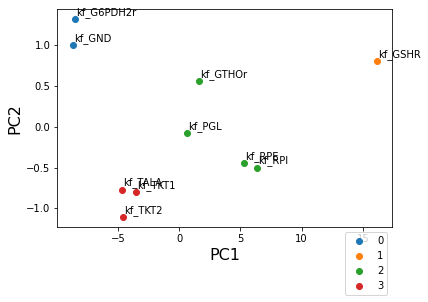

In [49]:
# ANSWER    

ax = PCA_cluster_plot(data_log.T, k10_labels)

In [50]:
data_norm = sklearn.preprocessing.normalize(data_log.T,norm='l2')
data_pc = PCA().fit_transform(data_norm.T)
data_pc = pd.DataFrame(data_pc, index = data_log.index)
plot_data = data_pc.iloc[:,0:2]
plot_data.columns = ["PC1", "PC2"]
plot_data["RXN"] = plot_data.index
plot_data["clusters"] = k10_labels
alt.data_transformers.disable_max_rows()
fig = alt.Chart(plot_data).mark_circle(size= 100).encode(
    alt.X("PC1", axis=alt.Axis( tickCount=5)),
    alt.Y('PC2',axis=alt.Axis( tickCount=5), ), 

    alt.Color('clusters', scale=alt.Scale(scheme='turbo')), 
    tooltip=['RXN']
).properties(
    width=400,
    height=400).interactive()
fig

C:\Users\sicil\AppData\Local\Temp\ipykernel_16640\4012768921.py:6 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sicil\AppData\Local\Temp\ipykernel_16640\4012768921.py:7 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


alt.Chart(...)

In [51]:
data_norm = sklearn.preprocessing.normalize(data_log.T,norm='l2')
data_pc = PCA().fit_transform(data_norm.T)
data_pc = pd.DataFrame(data_pc, index = data_log.index)
plot_data = data_pc.iloc[:,0:2]
plot_data.columns = ["PC1", "PC2"]
data_pc
plot_data["RXN"] = plot_data.index
plot_data["clusters"] = k10_labels
alt.data_transformers.disable_max_rows()
fig = alt.Chart(plot_data).mark_circle(size= 100).encode(
    alt.X("PC1", ),
    alt.Y('PC2' ), 

    alt.Color('clusters', scale=alt.Scale(scheme='dark2')), 
    tooltip=['RXN']
).properties(
    width=600,
    height=400)
# .interactive()
text = fig.mark_text(
    align='left',
    baseline='middle',
    dx=10
).encode(
    text='RXN'
)
fig+ text

C:\Users\sicil\AppData\Local\Temp\ipykernel_16640\2557550086.py:7 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sicil\AppData\Local\Temp\ipykernel_16640\2557550086.py:8 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


alt.LayerChart(...)

### Making distributions for percs

In [19]:
data_norm = sklearn.preprocessing.normalize(percs_df,norm='l2')
data_norm= pd.DataFrame(data_norm)
data_norm = data_norm.T
data_norm.columns = [data_log.index]
data_norm

RXN,kf_G6PDH2r,kf_PGL,kf_GND,kf_RPE,kf_RPI,kf_TKT1,kf_TKT2,kf_TALA,kf_GTHOr,kf_GSHR
0,0.007790,0.011529,0.011535,0.999563,0.999705,0.023304,0.005996,0.006535,0.005188,0.003683
1,0.007208,0.003658,0.005136,0.000433,0.000453,0.028155,0.045527,0.028162,0.000402,0.000203
2,0.030323,0.002451,0.016418,0.000748,0.000697,0.004290,0.001882,0.004291,0.010613,0.013031
3,0.032922,0.005834,0.028320,0.000806,0.000829,0.012497,0.006487,0.012500,0.011021,0.018360
4,0.002746,0.036741,0.016658,0.000752,0.000828,0.015643,0.007010,0.015647,0.001990,0.001140
...,...,...,...,...,...,...,...,...,...,...
1496,0.001742,0.003712,0.001716,0.000527,0.000422,0.009455,0.004469,0.009457,0.005183,0.068956
1497,0.005168,0.004195,0.006362,0.000904,0.000636,0.009203,0.013965,0.009206,0.005159,0.120232
1498,0.001795,0.003763,0.001615,0.000665,0.000570,0.023433,0.020764,0.023439,0.001394,0.028136
1499,0.002680,0.003407,0.004085,0.000710,0.000657,0.055126,0.061488,0.055139,0.007993,0.095951


In [20]:
data_vis = percs_df.T.melt()
data_vis.columns = ["RXN", "val"]

In [21]:
alt.data_transformers.disable_max_rows()
fig = alt.Chart(data_vis).mark_circle(size= 100).encode(
    alt.X("RXN", axis=alt.Axis( tickCount=5), scale=alt.Scale(type='log')),
    alt.Y('val',axis=alt.Axis( tickCount=5), 
    scale=alt.Scale(type='log')), 

    alt.Color('RXN', scale=alt.Scale(scheme='turbo')), 
    tooltip=['RXN', "val"]
).properties(
    width=400,
    height=400).interactive()
fig

alt.Chart(...)

In [22]:
data_log

,OG,No.0,No.1,No.2,No.3,No.4,No.5,No.6,No.7,No.8,...,No.1490,No.1491,No.1492,No.1493,No.1494,No.1495,No.1496,No.1497,No.1498,No.1499
RXN,,,,,,,,,,,,,,,,,,,,,
kf_G6PDH2r,9.992624,9.914984,11.351745,11.433981,8.950143,9.280101,7.475048,9.312512,8.936840,8.222558,...,11.670053,9.013267,8.980928,9.230231,9.550483,8.494765,9.582247,8.524799,8.925566,7.387953
kf_PGL,4.806666,3.658642,3.258421,4.125449,5.965728,5.350442,5.704338,6.357063,6.136862,4.430874,...,3.875239,3.970305,4.354222,3.580756,5.158144,3.673436,3.795653,3.687024,3.587744,3.868260
kf_GND,10.284927,9.475870,10.637945,11.183136,10.652447,9.442150,9.045911,10.592016,11.208532,8.937309,...,12.708685,9.868538,9.517150,9.004105,10.767556,8.379752,9.689927,8.318963,9.246884,8.670573
kf_RPE,9.634606,1.890786,2.437500,2.511701,2.442112,1.846536,2.157723,2.619194,2.269196,2.516198,...,3.191764,2.214861,1.999228,2.542693,2.275196,2.087513,2.626885,2.319437,2.384108,1.890143
kf_RPI,9.265266,1.566922,1.996467,2.170507,2.169318,1.533639,1.703706,2.056063,1.651282,1.753832,...,2.382924,1.570812,1.271201,1.751428,1.533835,1.494808,1.905103,1.795744,1.937955,1.411525
kf_TKT1,7.375226,7.564323,5.682768,6.752088,6.976615,7.547628,5.798198,6.975911,6.650959,6.416711,...,7.526593,6.963146,7.425043,8.050055,6.890905,6.473118,6.446145,7.380741,8.236197,8.001141
kf_TKT2,6.995992,9.023186,5.837222,7.074745,7.152246,9.002619,5.844056,6.771595,6.561527,5.815588,...,8.951852,7.893360,7.883768,8.034162,8.251978,6.702025,7.841427,8.238098,9.323725,8.854449
kf_TALA,6.738882,8.199680,6.318125,7.387445,7.611972,8.182985,6.433554,7.611268,7.286316,7.052068,...,8.161950,7.598503,8.060400,8.685412,7.526262,7.108475,7.081502,8.016098,8.871554,8.636498
kf_GTHOr,3.976495,1.417990,4.692211,4.729873,3.018430,4.617910,4.546338,4.345665,4.611673,5.492934,...,4.309014,2.276042,2.004801,1.419454,2.602166,3.975523,3.970838,2.661959,4.408732,2.276244


In [23]:
data_vis_log = data_log.T.melt()
data_vis_log.columns = ["RXN", "val"]

In [24]:
data_vis_log

,RXN,val
0,kf_G6PDH2r,9.992624
1,kf_G6PDH2r,9.914984
2,kf_G6PDH2r,11.351745
3,kf_G6PDH2r,11.433981
4,kf_G6PDH2r,8.950143
...,...,...
15005,kf_GSHR,-0.258203
15006,kf_GSHR,0.297751
15007,kf_GSHR,-1.154635
15008,kf_GSHR,0.072166


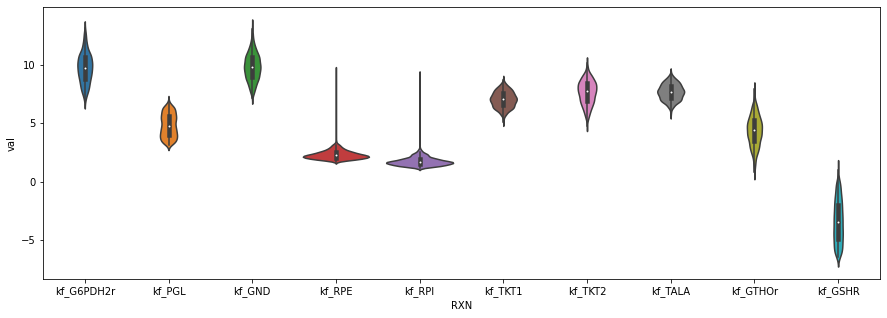

In [26]:
plt.figure(figsize= (15,5))
sns.violinplot(data=data_vis_log, 
               x = "RXN",
               y= "val" ,
            #    cut=0
            
               )


VP_sns = os.path.join(data_dir,"Violin_perc_dis_ppp.png")
# Saving figure by changing parameter values
plt.savefig(VP_sns, pad_inches=0.05)
plt.show()



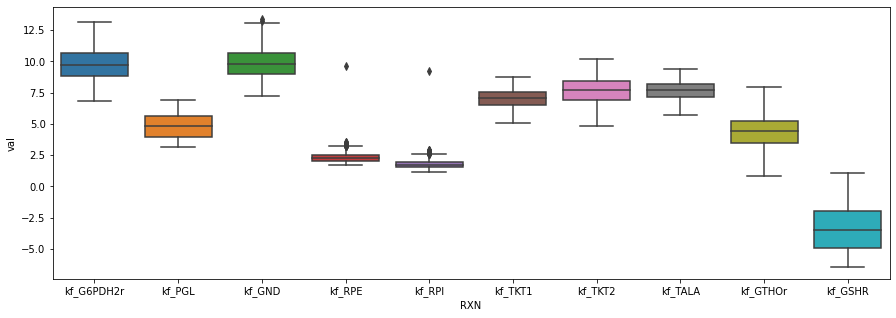

In [27]:
plt.figure(figsize= (15,5))
sns.boxplot(data=data_vis_log, 
               x = "RXN",
               y= "val" ,
            #    cut=0
            
               )


VP_sns = os.path.join(data_dir,"box_perc_dis_ppp.png")
# Saving figure by changing parameter values
plt.savefig(VP_sns, pad_inches=0.05)
plt.show()


In [102]:
# # Violin Plot of percs distribution without log tranforming
# alt.data_transformers.disable_max_rows()
# alt.Chart(data_vis).transform_density(
#     'val',
#     as_=['Value_column', 'density'],    
#     extent=[-0.1, 1000],
#     groupby=['RXN']
#     ).mark_area(orient='horizontal').encode(
#     y=alt.Y('Value_column:Q',axis=alt.Axis(grid=False,ticks=True)),
#     color='RXN:N',
#     x=alt.X('density:Q', stack='center',impute=None,
#         title=None,
#         axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True)),
#         tooltip=['RXN:N', "Value_column:Q"], 
#     column=alt.Column(
#         'RXN:N',header=alt.Header(
#             titleOrient='bottom',
#             labelOrient='bottom',
#             labelPadding=0))
# ).properties(
#     width=50).configure_facet(spacing=0).configure_view(stroke=None).interactive()

In [28]:
pca = decomposition.PCA().fit(data_norm.T)

# get the two important matrices & label them in pandas
pc_genes = pd.DataFrame(pca.components_,
                        columns = data_norm.index)
pc_samples = pd.DataFrame(pca.transform(data_norm.T),
                          index = data_norm.columns)

# get the explained variance, which will be useful later
exp_var = pca.explained_variance_ratio_

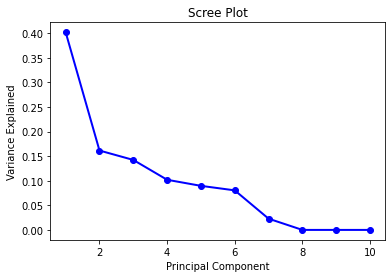

In [29]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [30]:
# get the cumulative variance
cum_var = exp_var.cumsum()

In [31]:
cum_var

array([0.40174125, 0.56306189, 0.70529595, 0.80719432, 0.8967609 ,
       0.97714943, 0.99999076, 0.9999985 , 1.        , 1.        ])

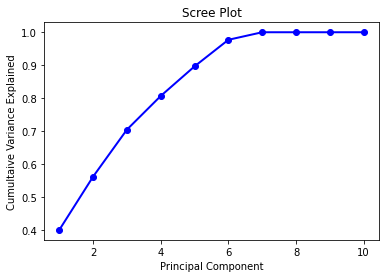

In [32]:
plt.plot(PC_values, cum_var, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumultaive Variance Explained')
plt.show()

Components to capture at least 80% of variance:  4


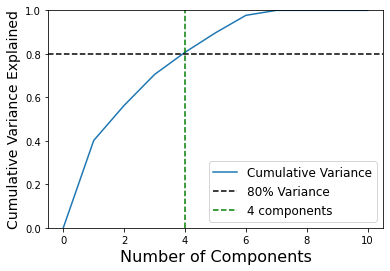

In [33]:
# find the number of components
index_80 = sum(cum_var <= 0.8)

# indices are zero-indexed, so the total number is one more than this
print('Components to capture at least 80% of variance: ', index_80+1)

# add a zero at the start so the plot extends all the way down
cum_var_plot = [0] + list(cum_var)

# plot
fig, ax = plt.subplots()
ax.plot(range(len(cum_var_plot)), cum_var_plot, label = 'Cumulative Variance')

# add some lines to illustrate the question
ax.axhline(0.8, color = 'k', linestyle = '--', label = '80% Variance')
ax.axvline(index_80+1, color = 'g', linestyle = '--', label = str(index_80+1)+ ' components')

# limit the y axes
ax.set_ylim([0, 1])

# axes labels and legend
ax.set_xlabel('Number of Components', fontsize = 16)
ax.set_ylabel('Cumulative Variance Explained', fontsize = 14)
_ = ax.legend(fontsize = 12)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
df_st =  StandardScaler().fit_transform(percs_df.T)  
pd.DataFrame(df_st, columns=percs_df.T.columns).head(2)

RXN,kf_G6PDH2r,kf_PGL,kf_GND,kf_RPE,kf_RPI,kf_TKT1,kf_TKT2,kf_TALA,kf_GTHOr,kf_GSHR
0,-0.264846,-0.406351,-0.129950,38.727572,38.728330,0.139680,-0.678567,-1.005019,-0.494538,-0.387016
1,-0.291371,-0.849829,-0.427957,-0.036570,-0.030884,0.471103,1.496546,0.471710,-0.725811,-0.540898


In [36]:
pca_out = PCA().fit(df_st)
pca_out.explained_variance_ratio_
np.cumsum(pca_out.explained_variance_ratio_)
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = percs_df.T.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
kf_G6PDH2r,0.022738,-0.009699,0.664292,-0.170100,-0.171256,0.214461,-0.672146,0.045486,-0.000260,0.000004
kf_PGL,-0.070417,-0.020375,0.086486,0.400325,-0.826264,-0.372373,0.074099,0.004600,0.000099,-0.000010
kf_GND,0.056236,-0.004823,0.687785,-0.033011,0.061270,0.118207,0.708403,-0.055815,-0.000171,-0.000015
kf_RPE,-0.024881,0.706175,0.012552,0.019671,-0.003701,-0.002123,-0.003436,0.002617,0.707155,-0.006964
kf_RPI,-0.025153,0.706161,0.012051,0.019898,-0.003914,-0.001711,-0.003001,0.006512,-0.706624,0.027855
kf_TKT1,0.591582,0.033205,-0.030793,0.027387,-0.038907,-0.017541,-0.039198,-0.379588,-0.018561,-0.706711
kf_TKT2,0.535685,0.014214,-0.042417,0.006650,-0.059336,0.049544,0.061905,0.837367,0.002261,-0.000030
kf_TALA,0.592176,0.012327,-0.031131,0.026788,-0.038801,-0.017472,-0.039077,-0.379674,0.016254,0.706919
kf_GTHOr,0.039687,-0.018264,0.266464,0.536991,0.525864,-0.569533,-0.182005,0.068571,-0.000127,0.000016


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

Generated correlation matrix plot for loadings

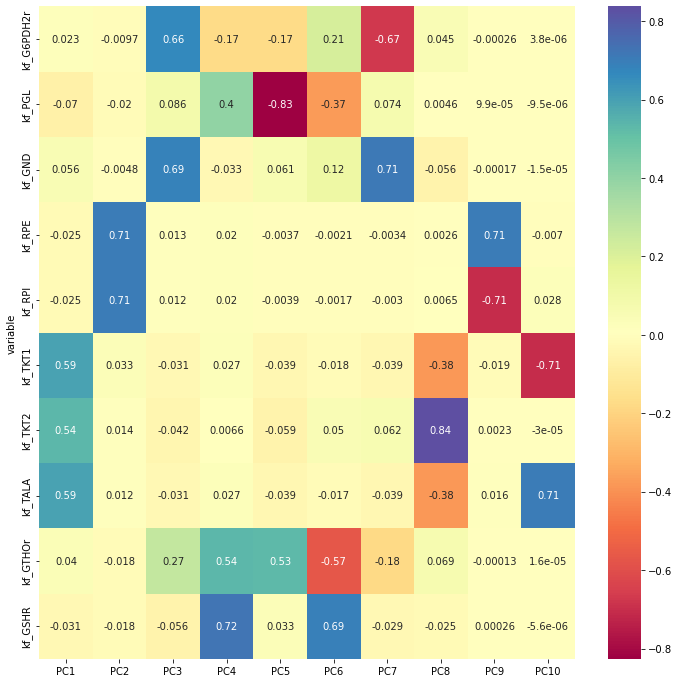

In [39]:
plt.figure(figsize= (12,12))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
heatmap_sns = os.path.join(data_dir,"ppp_heatmap.png")
# Saving figure by changing parameter values
plt.savefig(heatmap_sns, pad_inches=0.3)
plt.show()

In [ ]:
from sklearn import cluster, metrics, decomposition

In [ ]:
ica = decomposition.FastICA(n_components = None, random_state = 0)
A = ica.fit_transform(data_norm.T).transpose()

# these are the desired matrices
A = pd.DataFrame(A, columns = percs_df.index)
M = pd.DataFrame(ica.mixing_, index = percs_df.columns)

# reconstruct the data
data_norm_reconstructed = M.dot(A)

# compute the explained variance
ica_total_exp_var = metrics.explained_variance_score(
        data_norm, data_norm_reconstructed)
print('M*A explains %.2f%% of the variance in the data.'%(ica_total_exp_var*100))

In [ ]:
qcqa_model(ppp, parameters=True, concentrations=True,
           fluxes=True, superfluous=True, elemental=True)

In [ ]:
# Setup simulation object
sim = Simulation(ppp, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = sim.simulate(ppp, time=(0, 1e3))
# Quickly render and display time profiles
conc_sol.view_time_profile()

In [ ]:
ppp.compartments = {"c": "Cytosol"}
print(ppp.compartments)



In [ ]:
# Using pre-build units to define UnitDefinitions
concentration = UnitDefinition("mM", name="Millimolar",
                               list_of_units=["millimole", "per_litre"])
time = UnitDefinition("hr", name="hour", list_of_units=["hour"])

# Add units to model
ppp.add_units([concentration, time])
print(ppp.units)

In [ ]:
from mass.io import json

In [ ]:
json_rb_ppp= os.path.join(model_dir,"rbc_ppp.json")
json.save_json_model(mass_model=ppp, filename=json_rb_ppp)

